---
title: Fashion MNIST
categories: deep-learning
date: 2020-12-15
---


数据集State-of-the-Art详见

- [mnist](https://paperswithcode.com/sota/image-classification-on-mnist)
- [fashion-mnist](https://paperswithcode.com/sota/image-classification-on-fashion-mnist)
- [cifar-10](https://paperswithcode.com/sota/image-classification-on-cifar-10)

## 初始化

首先引入所用的包。然后是一些公共函数。下面代码比较长，可以先把函数的中文解释看过就好，细节忽略，后面用到再回来看。

In [1]:
import sys
import numpy as np
from tensorflow.keras import Model, layers, regularizers, preprocessing

base_path = '/tf/eipi10/xuxiangwen.github.io/_notes/05-ai/54-tensorflow/code'
sys.path.append(base_path)

from image_classification import set_gpu_memory, lr_schedule, image_data_generator 
from image_classification import ImageClassificationHelper, ImageDataset

set_gpu_memory(1024)
model_results={}

# 代码自动重新加载
%load_ext autoreload
%autoreload 2

# #当module有新的方法的时候，需要运行下面方法。
# %reload_ext autoreload

set max gpu memory to 1024


下面初始化模型运行的参数。

In [2]:
params = {
    'dataset_name': 'cifar10',
    'validation_percent': 0,    
    'use_data_augmentation': False,
    'augmentation_generator': image_data_generator(),     
    'batch_size': 32,    
    'epochs': 120,    
    'learning_rate':0.001,
    'dropout':0.1,
    'metrics':['accuracy'], 
    'restore_best_checkpoint':True,
    'callbacks': {
        'ModelCheckpoint': {
            'enabled': True,
            'monitor': 'val_accuracy',               
        },
        'EarlyStopping': {
            'enabled': True,
            'patience': 40,   
            'monitor': 'val_accuracy',            
        },
        'ReduceLROnPlateau': {
            'enabled': True,
            'monitor': 'val_loss',
            'patience': 15,
            'factor': np.sqrt(0.1),            
        },
        'LearningRateScheduler': {
            'enabled': True,
            'schedule': lr_schedule,            
        }             
    },
    'model_params':{
        'mlp':{'dropout':0.1},
        'lenet':{'dropout':0.2},
        'custom':{'dropout':0.2},
        'vgg':{'dropout':0.4},
        'resnet':{}
    }
}

params = DictToObject(params)
helper = ImageClassificationHelper(params=params, 
                                   data=ImageDataset(params), 
                                   model_results=model_results)

load cifar10 data from source
train: (50000, 32, 32, 3) (50000,)
test: (10000, 32, 32, 3) (10000,)
create train, validation and test dataset


In [ ]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import this

In [ ]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import this

## 数据

MNIST数据集包含60,000张training图片和10,000张test图片，每张图片由$28\times28$ 个像素点构成，每个像素点用一个灰度值(0−255)表示。下面查看一下其中的图片。

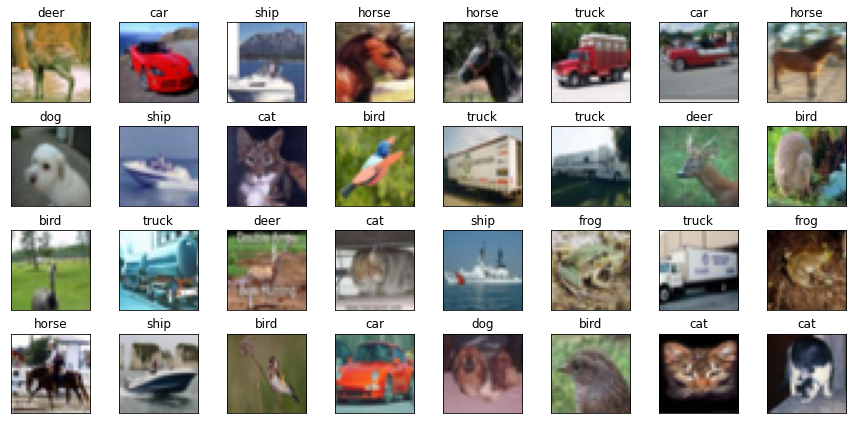

In [3]:
images, labels = iter(helper.data.train_dataset).next()
helper.show_images(images, labels, x_num=4, y_num=8, figsize=(12, 6))

然后看看做了data augmentation的图片。

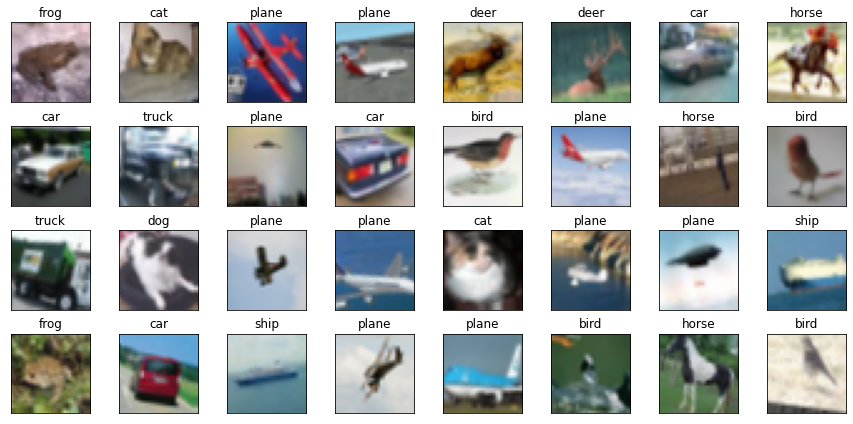

In [4]:
images, labels = helper.data.train_dataset_aug.next()
helper.show_images(images, labels, x_num=4, y_num=8, figsize=(12, 6))

下面来看看各个class的数据分布。可以看到各个数字的分布还是比较均匀的。

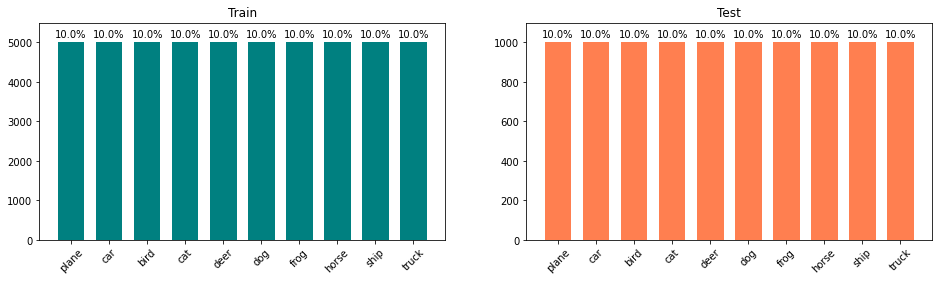

In [5]:
helper.plot_distribution()

## MLP

In [6]:
def get_mlp(helper, name='mlp', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name) 
    print('dropout={}'.format(dropout))
    
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Flatten()(input)
    x = layers.Dense(128, activation='relu')(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model

model = get_mlp(helper)
model.summary()

dropout=0.1
learning_rate=0.001
checkpoint_path=./checkpoints/cifar10/mlp/checkpoint
Model: "mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________




下面来训练模型。

2020-12-31 08:02:08,194: INFO: start training


use ModelCheckpoint(filepath=./checkpoints/cifar10/mlp/checkpoint, monitor=val_accuracy)
use EarlyStopping(monitor=val_accuracy, patience=40)
use ReduceLROnPlateau(monitor=val_loss, factor=0.31622776601683794, patience=15)
use LearningRateScheduler()
Epoch 1/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.9615 - accuracy: 0.2848 - val_loss: 1.8377 - val_accuracy: 0.3486
Epoch 2/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.8625 - accuracy: 0.3204 - val_loss: 1.7833 - val_accuracy: 0.3590
Epoch 3/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.8352 - accuracy: 0.3349 - val_loss: 1.7701 - val_accuracy: 0.3686
Epoch 4/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.8123 - accuracy: 0.3375 - val_loss: 1.7692 - val_accuracy: 0.3657
Epoch 5/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.7993 - accuracy: 0.3435 - val_loss: 1.7395 - val_accuracy: 0.3825
Epoch 6/120
1562/1562 [=

1562/1562 [==============================] - 4s 2ms/step - loss: 1.6731 - accuracy: 0.3970 - val_loss: 1.6721 - val_accuracy: 0.3962
Epoch 00094: Still keep learning rate 3.2e-06 instead of 1e-05
Epoch 94/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.6746 - accuracy: 0.3938 - val_loss: 1.6719 - val_accuracy: 0.3965
Epoch 00095: Still keep learning rate 3.2e-06 instead of 1e-05
Epoch 95/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.6772 - accuracy: 0.3928 - val_loss: 1.6719 - val_accuracy: 0.3969
Epoch 00096: Still keep learning rate 3.2e-06 instead of 1e-05
Epoch 96/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.6721 - accuracy: 0.3955 - val_loss: 1.6720 - val_accuracy: 0.3972
Epoch 00097: Still keep learning rate 3.2e-06 instead of 1e-05
Epoch 97/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.6760 - accuracy: 0.3951 - val_loss: 1.6721 - val_accuracy: 0.3966
Epoch 00098: Still keep learnin

2020-12-31 08:11:18,674: INFO: finish training [elapsed time: 550.48 seconds]


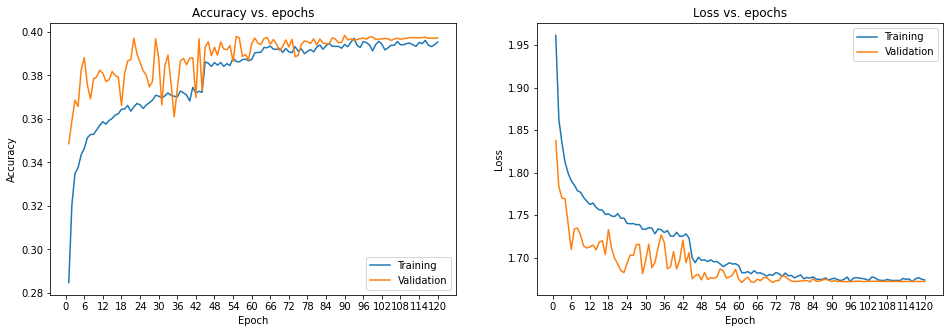

In [7]:
history = helper.train(model, epochs=helper.params.epochs)

---------------------------------------- evaluate ----------------------------------------
Test loss:1.6721, Test Accuracy:39.84%
---------------------------------------- confusion matrix ----------------------------------------


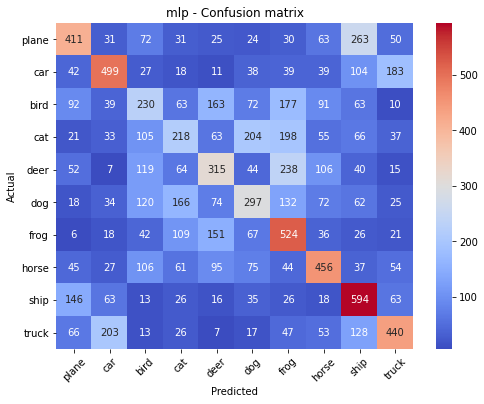

---------------------------------------- model improvement ----------------------------------------


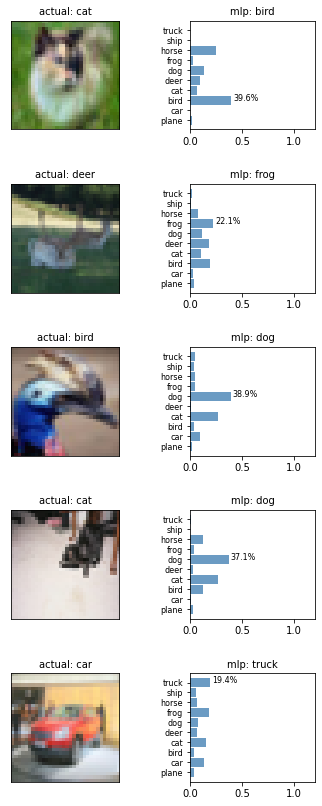

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
mlp,1.594395,0.4305,1.67206,0.3984,394634,550.0


In [8]:
helper.model_summary(model, history=history)




从上面的错误来看，模型对一些细节的判断不是很准。下面来尝试一下LeNet。

## LeNet

![image-20201019113632136](images/image-20201019113632136.png)

LeNet诞生于1994年，是Yann LeCun等人提出的，是最早的卷积神经网络之一。在LeNet中，输入层是32×32的图片，而MNIST是28×28的图片，为了保持模型的结构不变，在第一个Conv2D设置参数padding=’same’。首先创建模型，并训练。

In [9]:
def get_lenet(helper, name='lenet', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name) 
    print('dropout={}'.format(dropout))
    
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Conv2D(6, (5, 5), activation='relu', padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(16, (5, 5), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)   
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(120, activation='relu')(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(84, activation='relu')(x)   
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)  

    return model    

# 创建模型
model = get_lenet(helper)
model.summary()

dropout=0.2
learning_rate=0.001
checkpoint_path=./checkpoints/cifar10/lenet/checkpoint
Model: "lenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
________________________________________



下面来训练模型。

2020-12-31 08:11:27,706: INFO: start training


use ModelCheckpoint(filepath=./checkpoints/cifar10/lenet/checkpoint, monitor=val_accuracy)
use EarlyStopping(monitor=val_accuracy, patience=40)
use ReduceLROnPlateau(monitor=val_loss, factor=0.31622776601683794, patience=15)
use LearningRateScheduler()
Epoch 1/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.7150 - accuracy: 0.3731 - val_loss: 1.4573 - val_accuracy: 0.4709
Epoch 2/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.4350 - accuracy: 0.4846 - val_loss: 1.2605 - val_accuracy: 0.5445
Epoch 3/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.3363 - accuracy: 0.5192 - val_loss: 1.4299 - val_accuracy: 0.4824
Epoch 4/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.2771 - accuracy: 0.5431 - val_loss: 1.3957 - val_accuracy: 0.5123
Epoch 5/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.2306 - accuracy: 0.5624 - val_loss: 1.4276 - val_accuracy: 0.4882
Epoch 6/120
1562/1562 

1562/1562 [==============================] - 6s 4ms/step - loss: 0.7420 - accuracy: 0.7382 - val_loss: 0.7875 - val_accuracy: 0.7274
Epoch 107/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.7382 - accuracy: 0.7406 - val_loss: 0.7879 - val_accuracy: 0.7272
Epoch 108/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.7413 - accuracy: 0.7383 - val_loss: 0.7879 - val_accuracy: 0.7277
Epoch 109/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.7378 - accuracy: 0.7398 - val_loss: 0.7884 - val_accuracy: 0.7272
Epoch 110/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.7315 - accuracy: 0.7435 - val_loss: 0.7883 - val_accuracy: 0.7272
Epoch 111/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.7300 - accuracy: 0.7436 - val_loss: 0.7879 - val_accuracy: 0.7279
Epoch 112/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.7329 - accuracy: 0.7405 - val_loss: 0.7888 - val_ac

2020-12-31 08:24:36,038: INFO: finish training [elapsed time: 788.33 seconds]


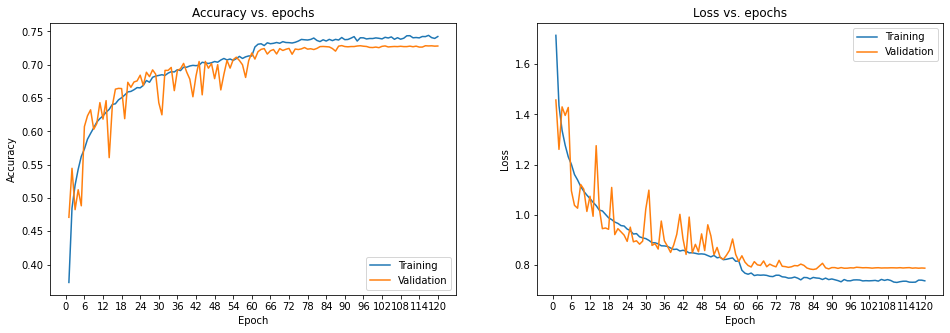

In [10]:
# 训练
history = helper.train(model, epochs=helper.params.epochs)



下面来评估模型并和mlp模型进行对比。

---------------------------------------- evaluate ----------------------------------------
Test loss:0.7841, Test Accuracy:72.87%
---------------------------------------- confusion matrix ----------------------------------------


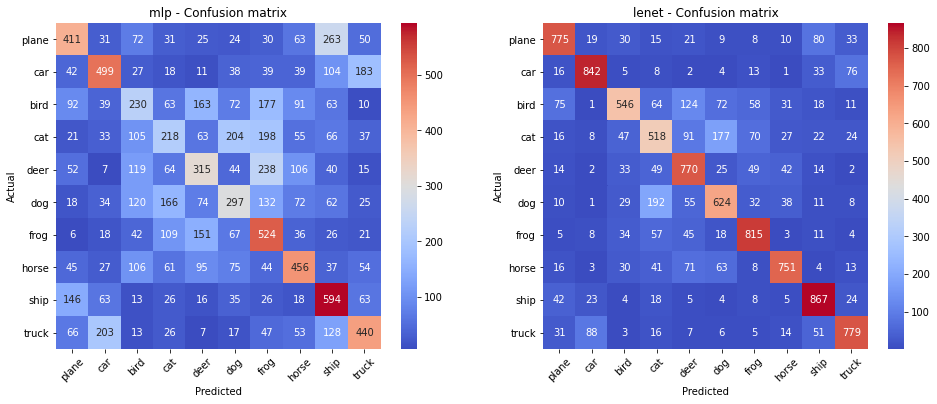

---------------------------------------- model improvement ----------------------------------------


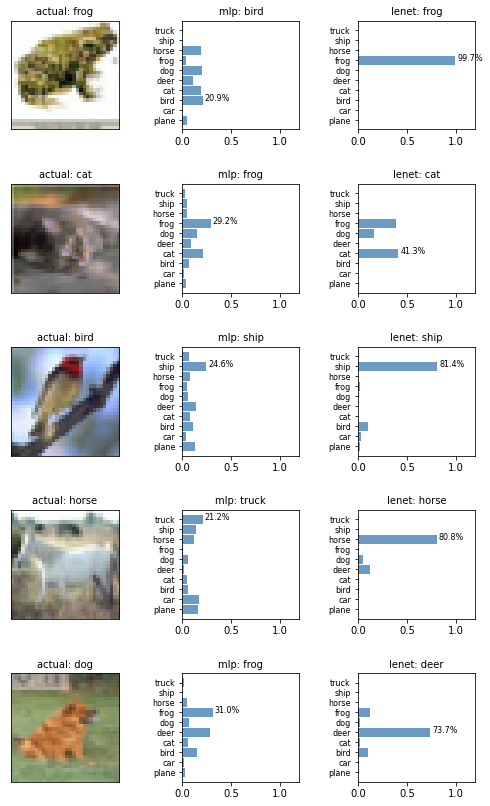

---------------------------------------- error analysis ----------------------------------------


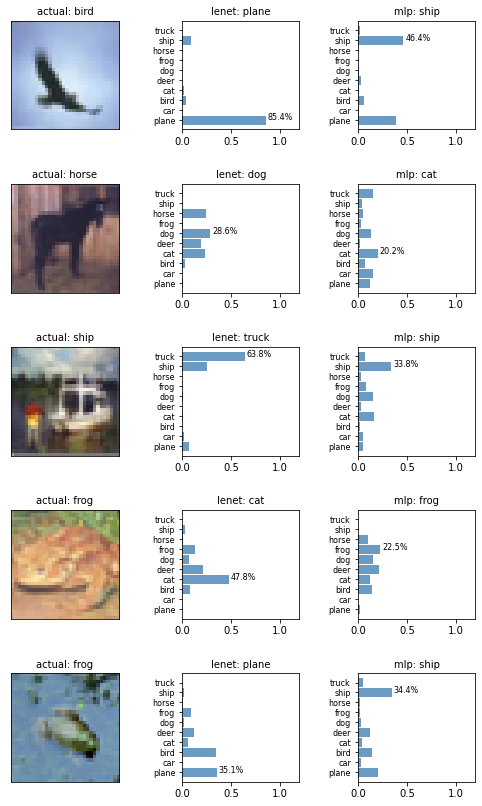

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
lenet,0.466231,0.8435,0.784104,0.7287,83170,788.0
mlp,1.594395,0.4305,1.672060,0.3984,394634,550.0


In [11]:
helper.model_summary(model, history=history)



从上面的图中，可以看到，Lenet的参数只有mlp的60%，但其的准确率比mlp提升了差不多1%。上面最后一张图中，有三列，第一列是数字图片，它们是mlp中分错的数字，第二列是mlp中的分类，第三列是lenet中的分类，可以看到lenet的确学到了一些mlp中没有的模式。下面再来看看哪些数字在lenet也分错了。


上图中，可以看到对于部分数字的识别，mlp甚至要更好一点啊，还有一些数字，则是一起都错了。

## Custom 1

下面自己定义一个模型，这个模型和lenet的主要区别是，增加了卷积的深度。

In [12]:
def get_custom1(helper, name='custom_cnn', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name)
    print('dropout={}'.format(dropout))
        
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x) 
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)  
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model   

# 创建模型
model = get_custom1(helper)
model.summary()

dropout=0.2
learning_rate=0.001
checkpoint_path=./checkpoints/cifar10/custom_cnn/checkpoint
Model: "custom_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
______________________________


可以发现参数的个数已经和mlp差不多了，下面来训练模型。

2020-12-31 08:24:50,894: INFO: start training


use ModelCheckpoint(filepath=./checkpoints/cifar10/custom_cnn/checkpoint, monitor=val_accuracy)
use EarlyStopping(monitor=val_accuracy, patience=40)
use ReduceLROnPlateau(monitor=val_loss, factor=0.31622776601683794, patience=15)
use LearningRateScheduler()
Epoch 1/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.6131 - accuracy: 0.4181 - val_loss: 1.6826 - val_accuracy: 0.4410
Epoch 2/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.2741 - accuracy: 0.5478 - val_loss: 1.4585 - val_accuracy: 0.4911
Epoch 3/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.1473 - accuracy: 0.5934 - val_loss: 1.2097 - val_accuracy: 0.5671
Epoch 4/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.0684 - accuracy: 0.6259 - val_loss: 0.9716 - val_accuracy: 0.6549
Epoch 5/120
1562/1562 [==============================] - 6s 4ms/step - loss: 1.0069 - accuracy: 0.6453 - val_loss: 0.8946 - val_accuracy: 0.6820
Epoch 6/120
1562/

1562/1562 [==============================] - 6s 4ms/step - loss: 0.5384 - accuracy: 0.8116 - val_loss: 0.5880 - val_accuracy: 0.7981
Epoch 109/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.5453 - accuracy: 0.8108 - val_loss: 0.5868 - val_accuracy: 0.7986
Epoch 110/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.5386 - accuracy: 0.8099 - val_loss: 0.5872 - val_accuracy: 0.7989
Epoch 111/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.5436 - accuracy: 0.8082 - val_loss: 0.5899 - val_accuracy: 0.7979
Epoch 112/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.5421 - accuracy: 0.8093 - val_loss: 0.5882 - val_accuracy: 0.7983
Epoch 113/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.5366 - accuracy: 0.8111 - val_loss: 0.5888 - val_accuracy: 0.7975
Epoch 114/120
1562/1562 [==============================] - 6s 4ms/step - loss: 0.5358 - accuracy: 0.8125 - val_loss: 0.5876 - val_ac

2020-12-31 08:38:36,455: INFO: finish training [elapsed time: 825.56 seconds]


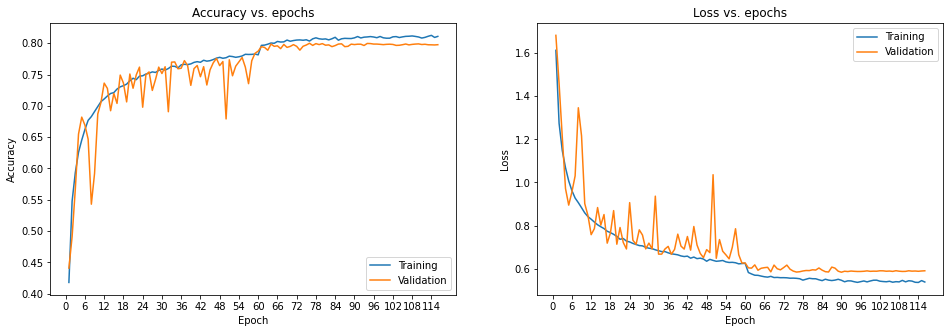

In [13]:
# 训练
history = helper.train(model, epochs=helper.params.epochs)



下面来评估模型并和lenet模型进行对比。

---------------------------------------- evaluate ----------------------------------------
Test loss:0.5840, Test Accuracy:79.99%
---------------------------------------- confusion matrix ----------------------------------------


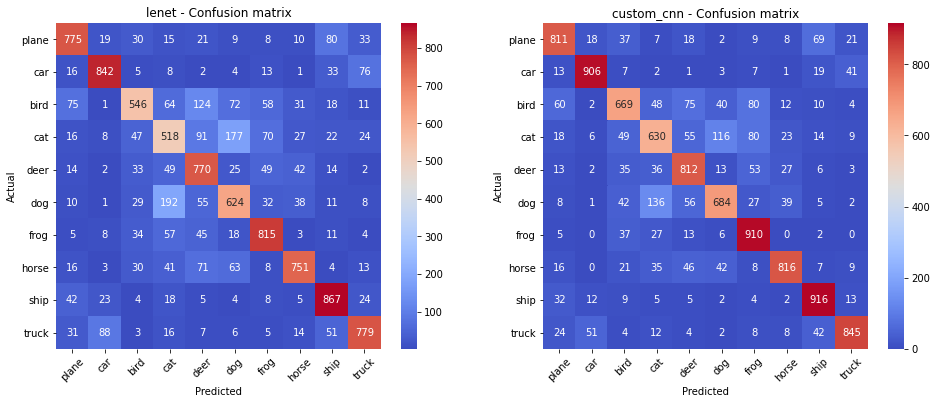

---------------------------------------- model improvement ----------------------------------------


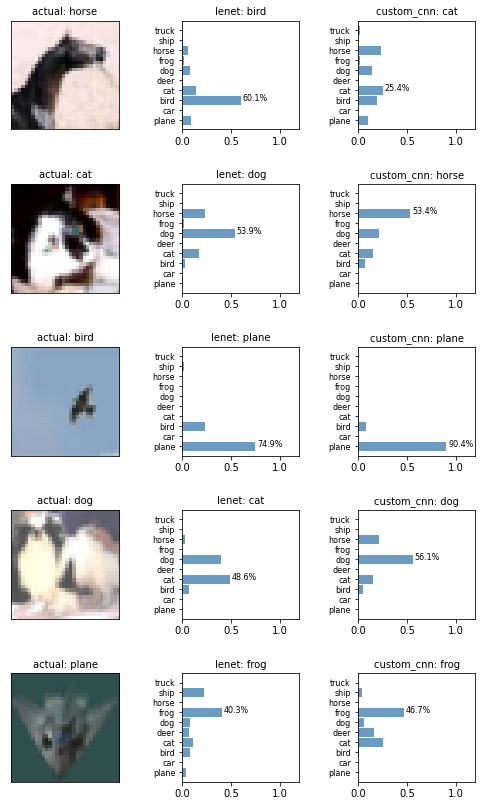

---------------------------------------- error analysis ----------------------------------------


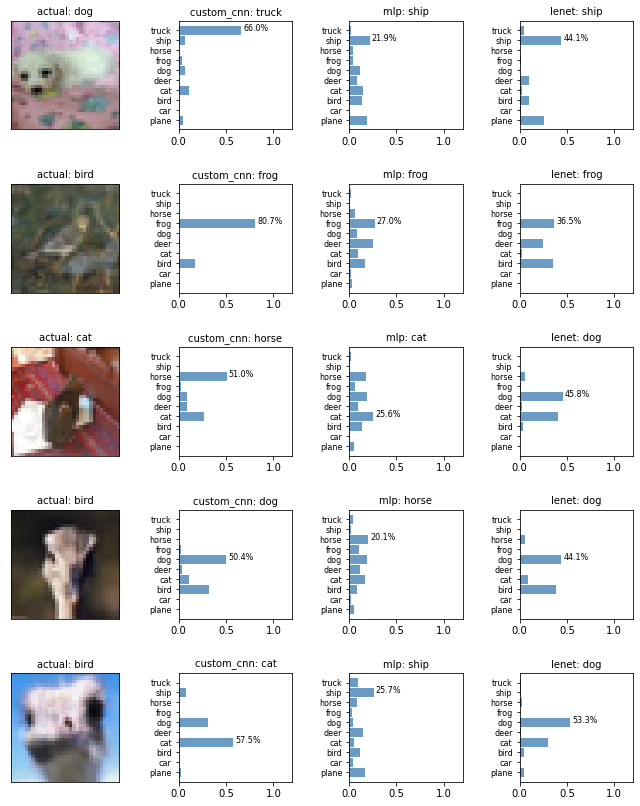

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
custom_cnn,0.310251,0.8954,0.583991,0.7999,73738,825.0
lenet,0.466231,0.8435,0.784104,0.7287,83170,788.0
mlp,1.594395,0.4305,1.672060,0.3984,394634,550.0


In [14]:
helper.model_summary(model, history=history)



可以看到custom1模型的效果比lenet有些许提升（经过多次测试，平均好0.1-0.3个百分点）。上面最后一幅图，也能看到custom1模型学习到了不少新的模式。下面来看错误分析。

## VGG

In [15]:
def get_block(x, filters, conv_count, kernel_size=(3, 3), padding='same', use_bn=True, dropout=0, block_name='block'):
    for i in range(conv_count):
        x = layers.Conv2D(filters, kernel_size, padding=padding, name='{}_con{}'.format(block_name, i+1))(x)
        if use_bn: x = layers.BatchNormalization(name='{}_bn{}'.format(block_name, i+1))(x)
        x = layers.ReLU(name='{}_relu{}'.format(block_name, i+1))(x)
    x = layers.MaxPooling2D((2, 2), name='{}_maxpooling1'.format(block_name))(x)
    if dropout>0: x = layers.Dropout(dropout, name='{}_dropout1'.format(block_name))(x)
    return x
    
def get_vgg(helper, name='vgg',
              dense_layer_count=1, 
              dense_layer_units=128,
              conv_filters=64,
              block_count=3,
              use_bn=True,
              dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name)
    print('dropout={}'.format(dropout))
        
    input = layers.Input(shape=helper.data.input_shape)
    x = input    
    for i in range(block_count): 
        x = get_block(x, conv_filters, conv_count=2, use_bn=use_bn, dropout=dropout, 
                      block_name='block{}'.format(i+1))
        conv_filters = conv_filters*2
                    
    x = layers.Flatten()(x)
    for i in range(dense_layer_count):
        x = layers.Dense(128, activation='relu')(x)
        if dropout>0: x = layers.Dropout(dropout)(x)    
    x = layers.Dense(10)(x)
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model


model = get_vgg(helper, dense_layer_count=1, block_count=3, name='vgg8')
model.summary()



dropout=0.4
learning_rate=0.001
checkpoint_path=./checkpoints/cifar10/vgg8/checkpoint
Model: "vgg8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_con1 (Conv2D)         (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_bn1 (BatchNormalizati (None, 32, 32, 64)        256       
_________________________________________________________________
block1_relu1 (ReLU)          (None, 32, 32, 64)        0         
_________________________________________________________________
block1_con2 (Conv2D)         (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_bn2 (BatchNormalizati (None, 32, 32, 64)        256       
__________________________________________

2020-12-31 08:38:52,721: INFO: start training


use ModelCheckpoint(filepath=./checkpoints/cifar10/vgg8/checkpoint, monitor=val_accuracy)
use EarlyStopping(monitor=val_accuracy, patience=40)
use ReduceLROnPlateau(monitor=val_loss, factor=0.31622776601683794, patience=15)
use LearningRateScheduler()
Epoch 1/120
1562/1562 [==============================] - 16s 10ms/step - loss: 2.1626 - accuracy: 0.1599 - val_loss: 2.0322 - val_accuracy: 0.2080
Epoch 2/120
1562/1562 [==============================] - 16s 10ms/step - loss: 2.0556 - accuracy: 0.1772 - val_loss: 1.9797 - val_accuracy: 0.1944
Epoch 3/120
1562/1562 [==============================] - 16s 10ms/step - loss: 2.0276 - accuracy: 0.1870 - val_loss: 1.9738 - val_accuracy: 0.2145
Epoch 4/120
1562/1562 [==============================] - 16s 10ms/step - loss: 1.9480 - accuracy: 0.2383 - val_loss: 1.8064 - val_accuracy: 0.3000
Epoch 5/120
1562/1562 [==============================] - 16s 10ms/step - loss: 1.8126 - accuracy: 0.2966 - val_loss: 1.5506 - val_accuracy: 0.4121
Epoch 6/120
1

Epoch 00052: Still keep learning rate 0.0003162 instead of 0.001
Epoch 52/120
1562/1562 [==============================] - 16s 10ms/step - loss: 0.1218 - accuracy: 0.9578 - val_loss: 0.4806 - val_accuracy: 0.8898
Epoch 00053: Still keep learning rate 0.0003162 instead of 0.001
Epoch 53/120
1562/1562 [==============================] - 15s 10ms/step - loss: 0.1215 - accuracy: 0.9590 - val_loss: 0.4742 - val_accuracy: 0.8878
Epoch 00054: Still keep learning rate 0.0003162 instead of 0.001
Epoch 54/120
1562/1562 [==============================] - 15s 10ms/step - loss: 0.1167 - accuracy: 0.9598 - val_loss: 0.4872 - val_accuracy: 0.8850
Epoch 00055: Still keep learning rate 0.0003162 instead of 0.001
Epoch 55/120
1562/1562 [==============================] - 15s 10ms/step - loss: 0.1153 - accuracy: 0.9603 - val_loss: 0.4896 - val_accuracy: 0.8860
Epoch 00056: Still keep learning rate 0.0003162 instead of 0.001
Epoch 56/120
1562/1562 [==============================] - 15s 10ms/step - loss: 0.1

1562/1562 [==============================] - 15s 10ms/step - loss: 0.0739 - accuracy: 0.9750 - val_loss: 0.5112 - val_accuracy: 0.8921
Epoch 00090: Still keep learning rate 1e-05 instead of 0.0001
Epoch 90/120
1562/1562 [==============================] - 15s 10ms/step - loss: 0.0738 - accuracy: 0.9755 - val_loss: 0.5158 - val_accuracy: 0.8917
Epoch 91/120
1562/1562 [==============================] - 16s 10ms/step - loss: 0.0697 - accuracy: 0.9767 - val_loss: 0.5141 - val_accuracy: 0.8922
Epoch 92/120
1561/1562 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9753
Epoch 00092: ReduceLROnPlateau reducing learning rate to 3.1622775802825263e-06.
1562/1562 [==============================] - 15s 10ms/step - loss: 0.0719 - accuracy: 0.9753 - val_loss: 0.5133 - val_accuracy: 0.8920
Epoch 00093: Still keep learning rate 3.2e-06 instead of 1e-05
Epoch 93/120
1562/1562 [==============================] - 15s 10ms/step - loss: 0.0726 - accuracy: 0.9753 - val_loss: 0.5150 - v

2020-12-31 09:11:42,072: INFO: finish training [elapsed time: 1969.35 seconds]


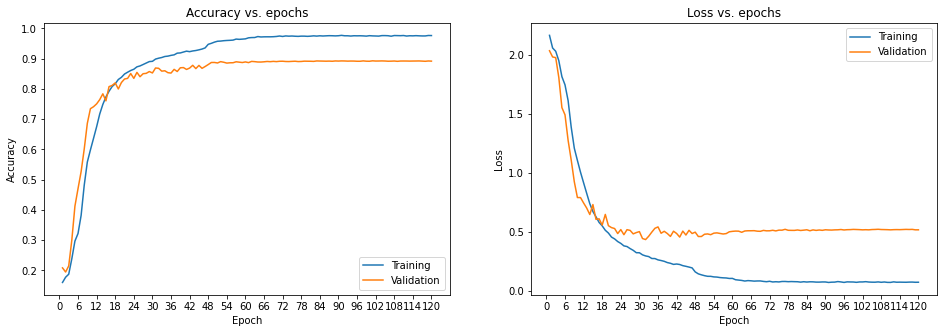

In [16]:
# 训练
history = helper.train(model, epochs=helper.params.epochs)

---------------------------------------- evaluate ----------------------------------------
Test loss:0.5170, Test Accuracy:89.25%
---------------------------------------- confusion matrix ----------------------------------------


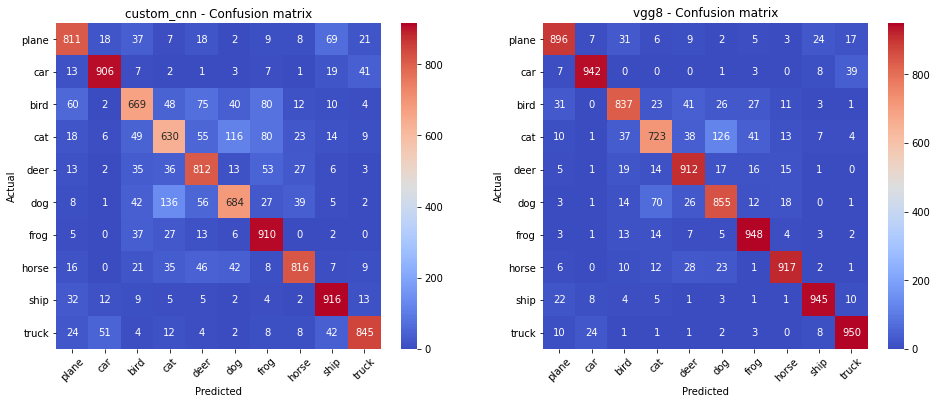

---------------------------------------- model improvement ----------------------------------------


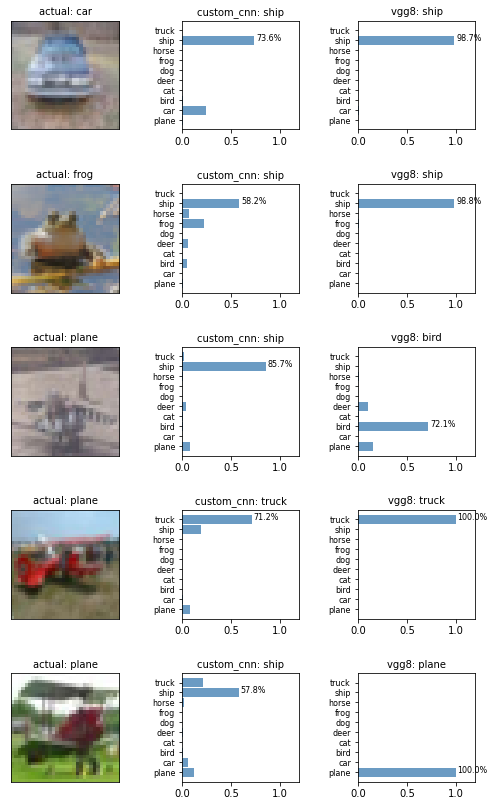

---------------------------------------- error analysis ----------------------------------------


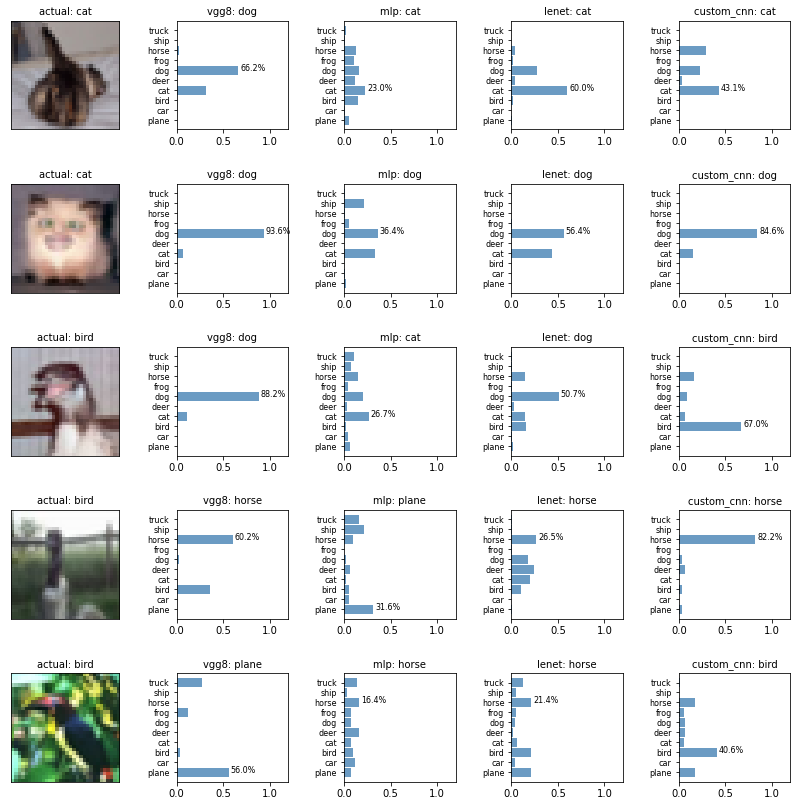

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
vgg8,0.002738,0.9997,0.516973,0.8925,1672906,1969.0
custom_cnn,0.310251,0.8954,0.583991,0.7999,73738,825.0
lenet,0.466231,0.8435,0.784104,0.7287,83170,788.0
mlp,1.594395,0.4305,1.672060,0.3984,394634,550.0


In [17]:
helper.model_summary(model, history=history)

## Resnet

参考https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter2-deep-networks/resnet-cifar10-2.2.1.py

In [18]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder
    Arguments:
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or bn-activation-conv (False)
    Returns:
        x (tensor): tensor as input to the next layer
    """
    conv = layers.Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = layers.BatchNormalization()(x)
        if activation is not None:
            x = layers.Activation(activation)(x)
    else:
        if batch_normalization:
            x = layers.BatchNormalization()(x)
        if activation is not None:
            x = layers.Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10, name='resnet_v1'):
    """ResNet Version 1 Model builder [a]
    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved
    (downsampled) by a convolutional layer with strides=2, while 
    the number of filters is doubled. Within each stage, 
    the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M
    Arguments:
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)
    Returns:
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, in [a])')
    # start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = layers.Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            # first layer but not first stack
            if stack > 0 and res_block == 0:  
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            # first layer but not first stack
            
            if stack > 0 and res_block == 0:
                # linear projection residual shortcut
                # connection to match changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = layers.add([x, y])
            x = layers.Activation('relu')(x)

        num_filters *= 2

    # add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = layers.AveragePooling2D(pool_size=7)(x)
    y = layers.Flatten()(x)
    outputs = layers.Dense(num_classes, kernel_initializer='he_normal')(y)

    # instantiate model.
    model = Model(inputs=inputs, outputs=outputs, name=name)
    return model

def get_resnet_v1(helper, depth=32, name='resnet_v1'):       
    model = resnet_v1(helper.data.input_shape, depth=depth, name='{}_{}'.format(name, depth))
    helper.compile(model)
    return model

model = get_resnet_v1(helper, depth=20)
model.summary()

learning_rate=0.001
checkpoint_path=./checkpoints/cifar10/resnet_v1_20/checkpoint
Model: "resnet_v1_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 32, 32, 16)   448         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 32, 32, 16)   64          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization_5[0][0]      
_____

2020-12-31 09:12:02,963: INFO: start training


use ModelCheckpoint(filepath=./checkpoints/cifar10/resnet_v1_20/checkpoint, monitor=val_accuracy)
use EarlyStopping(monitor=val_accuracy, patience=40)
use ReduceLROnPlateau(monitor=val_loss, factor=0.31622776601683794, patience=15)
use LearningRateScheduler()
Epoch 1/120
1562/1562 [==============================] - 23s 14ms/step - loss: 1.4820 - accuracy: 0.5192 - val_loss: 1.6416 - val_accuracy: 0.5078
Epoch 2/120
1562/1562 [==============================] - 22s 14ms/step - loss: 1.0728 - accuracy: 0.6770 - val_loss: 1.2015 - val_accuracy: 0.6437
Epoch 3/120
1562/1562 [==============================] - 22s 14ms/step - loss: 0.9095 - accuracy: 0.7388 - val_loss: 1.0062 - val_accuracy: 0.7074
Epoch 4/120
1562/1562 [==============================] - 22s 14ms/step - loss: 0.8071 - accuracy: 0.7777 - val_loss: 1.0038 - val_accuracy: 0.7172
Epoch 5/120
1562/1562 [==============================] - 22s 14ms/step - loss: 0.7341 - accuracy: 0.8056 - val_loss: 0.8636 - val_accuracy: 0.7565
Epoch

Epoch 00043: Still keep learning rate 0.0001 instead of 0.001
Epoch 43/120
1562/1562 [==============================] - 22s 14ms/step - loss: 0.1327 - accuracy: 0.9991 - val_loss: 1.0720 - val_accuracy: 0.8310
Epoch 00044: Still keep learning rate 0.0001 instead of 0.001
Epoch 44/120
1562/1562 [==============================] - 22s 14ms/step - loss: 0.1295 - accuracy: 0.9990 - val_loss: 1.0853 - val_accuracy: 0.8323
Epoch 00045: Still keep learning rate 0.0001 instead of 0.001
Epoch 45/120
1562/1562 [==============================] - 22s 14ms/step - loss: 0.1264 - accuracy: 0.9989 - val_loss: 1.0697 - val_accuracy: 0.8312
Epoch 00046: Still keep learning rate 0.0001 instead of 0.001
Epoch 46/120
1562/1562 [==============================] - 22s 14ms/step - loss: 0.1235 - accuracy: 0.9991 - val_loss: 1.0823 - val_accuracy: 0.8291
Epoch 00047: Still keep learning rate 0.0001 instead of 0.001
Epoch 47/120
1562/1562 [==============================] - 22s 14ms/step - loss: 0.1200 - accuracy:

1562/1562 [==============================] - 22s 14ms/step - loss: 0.1133 - accuracy: 0.9999 - val_loss: 1.0379 - val_accuracy: 0.8410
Epoch 00088: Still keep learning rate 3.16e-05 instead of 0.0001
Epoch 88/120
1562/1562 [==============================] - 22s 14ms/step - loss: 0.1111 - accuracy: 0.9999 - val_loss: 1.0277 - val_accuracy: 0.8410
Epoch 00089: Still keep learning rate 3.16e-05 instead of 0.0001
Epoch 89/120
1562/1562 [==============================] - 22s 14ms/step - loss: 0.1091 - accuracy: 0.9999 - val_loss: 1.0320 - val_accuracy: 0.8407
Epoch 00090: Still keep learning rate 3.16e-05 instead of 0.0001
Epoch 90/120
1562/1562 [==============================] - 22s 14ms/step - loss: 0.1069 - accuracy: 0.9999 - val_loss: 1.0361 - val_accuracy: 0.8393
Epoch 00091: LearningRateScheduler reducing learning rate to 1e-05 from 3.16e-05.
Epoch 91/120
1559/1562 [============================>.] - ETA: 0s - loss: 0.1055 - accuracy: 0.9999
Epoch 00091: ReduceLROnPlateau reducing lear

2020-12-31 09:57:40,262: INFO: finish training [elapsed time: 2737.30 seconds]


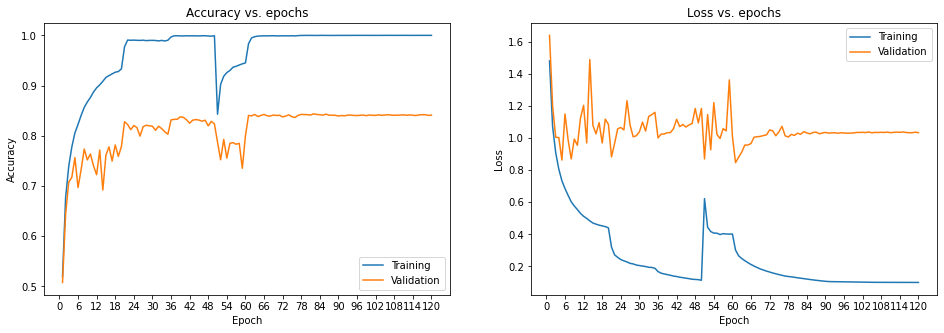

In [19]:
history = helper.train(model, epochs=helper.params.epochs)

---------------------------------------- evaluate ----------------------------------------
Test loss:1.0240, Test Accuracy:84.36%
---------------------------------------- confusion matrix ----------------------------------------


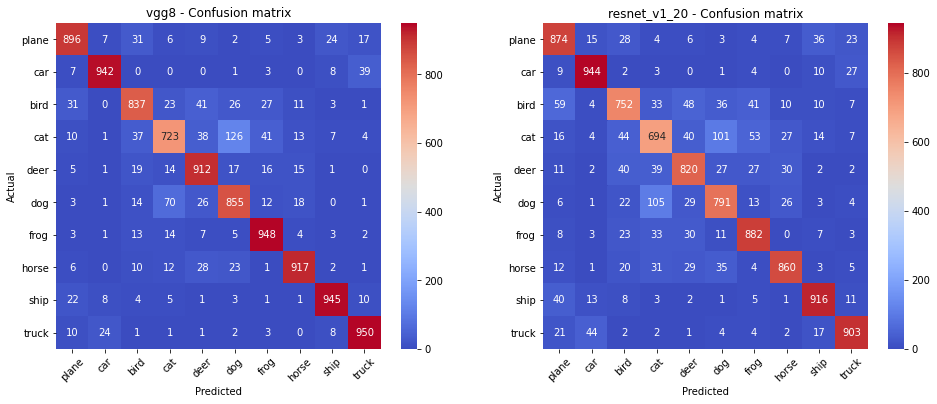

---------------------------------------- model improvement ----------------------------------------


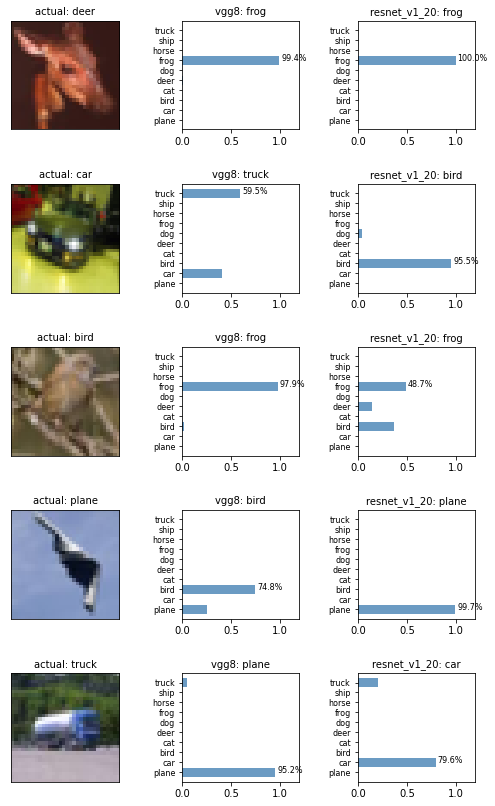

---------------------------------------- error analysis ----------------------------------------


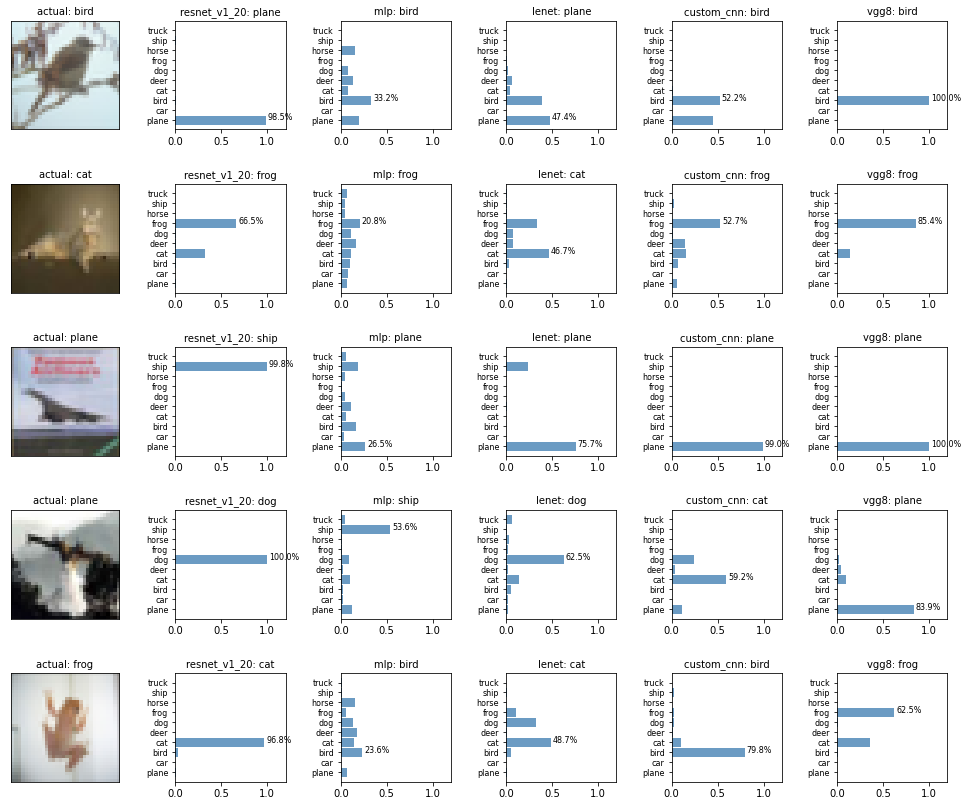

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
vgg8,0.002738,0.9997,0.516973,0.8925,1672906,1969.0
resnet_v1_20,0.123710,1.0000,1.023972,0.8436,273066,2737.0
custom_cnn,0.310251,0.8954,0.583991,0.7999,73738,825.0
lenet,0.466231,0.8435,0.784104,0.7287,83170,788.0
mlp,1.594395,0.4305,1.672060,0.3984,394634,550.0


In [20]:
helper.model_summary(model, history=history)

## 总结